In [1]:
#import loabraries
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [2]:
#load data
data=pd.read_csv("salary_data.csv")

In [4]:
#data
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
#get info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# correlation

In [55]:
 #find type of correlation .here there is +ve correaltion.
    data.corr()

IndentationError: unexpected indent (<ipython-input-55-06b20a559c0a>, line 2)

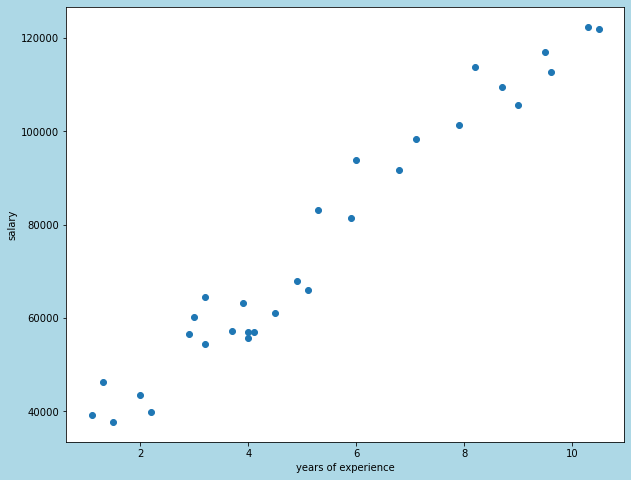

In [56]:
#find type using scatterplot
plt.figure(figsize=(10,8),facecolor="lightblue")
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.show()

by plot we can conclude that dataset has positive correlation

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

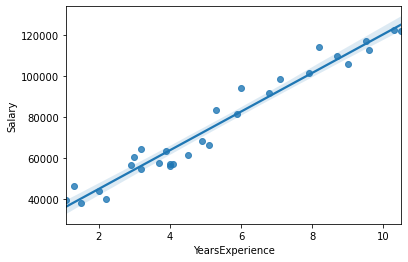

In [14]:

sns.regplot(x=data["YearsExperience"],y=data["Salary"])

In [28]:

lm=LinearRegression()
x=data["YearsExperience"].values.reshape(30,-1)
y=data["Salary"].values.reshape(30,-1)
#plot model
reg_sklearn=lm.fit(x,y)
reg_sklearn
#y= alpha+beta
print(reg_sklearn.coef_) #alpha
print(reg_sklearn.intercept_) #beta


[[9449.96232146]]
[25792.20019867]


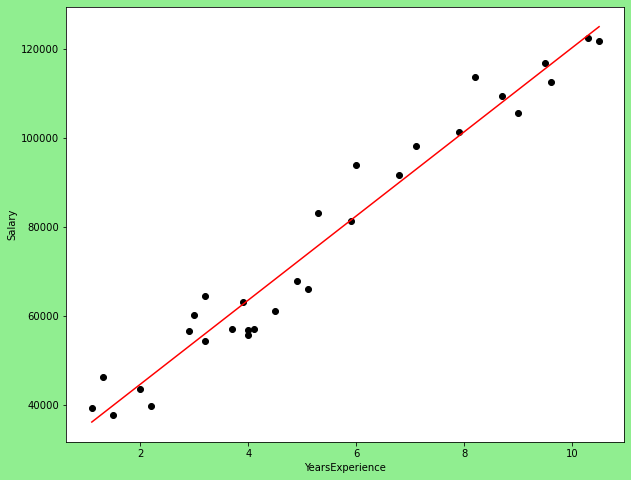

In [31]:
#plot model wrt to salary hike .
plt.figure(figsize=(10,8),facecolor="lightgreen")
plt.scatter(data.YearsExperience,data.Salary,color="black")
plt.plot(data.YearsExperience,data.YearsExperience*reg_sklearn.coef_[0]+reg_sklearn.intercept_,color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.show()

In [33]:
#model validation
pred_train_lm=reg_sklearn.predict(x)
r2_score(data["Salary"],pred_train_lm)
#to check whether the modelis good or not,when r2 is = grater than 0.8 ,so we can say that model is  good.

0.9569566641435086

In [34]:
# model with statmodel

In [35]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
model = smf.ols("YearsExperience~Salary",data= data).fit()

In [38]:
#Coefficients
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [39]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [40]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [41]:
# Predict for new data point

In [54]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([100,200])

In [52]:
data_pred=pd.DataFrame(newdata,columns=['Salary'])

In [53]:
model.predict(data_pred)

0   -2.281895
1   -2.362907
dtype: float64